# Annual maxima
This notebook computes the annual maxima of the sea surface heights of the six main tide gauges along the Dutch coast. 
The annual maxima approach is the traditional method for computing extreme value distributions. These days we use a peak over threshold approach. One problem with this dataset is that the sampling rate increases from 1/3 hours to 1/minute, which by itself increases the annual maximum. You are more likely to sample near the real maximum if you sample more often.

In [1]:
import pathlib
import datetime

import numpy as np
import netCDF4
import pandas as pd
import utide
import matplotlib.pyplot as plt
import peakutils
import IPython.display
import ipywidgets.widgets

%matplotlib inline

In [2]:
# lookup local copies of the datasets
datasets = list(pathlib.Path('../../data/waterbase').glob('id1-*.nc'))

# convert to pandas Series, so we can resample
all_series = {}
for dataset in datasets:
    name = dataset.stem[4:]
    ds = netCDF4.Dataset(dataset)
    ds.variables.keys()
    ssh = np.squeeze(ds.variables['sea_surface_height'][:])
    time = netCDF4.num2date(ds.variables['time'][:], ds.variables['time'].units)
    series = pd.Series(data=ssh, index=time, name=name)
    all_series[name] = series

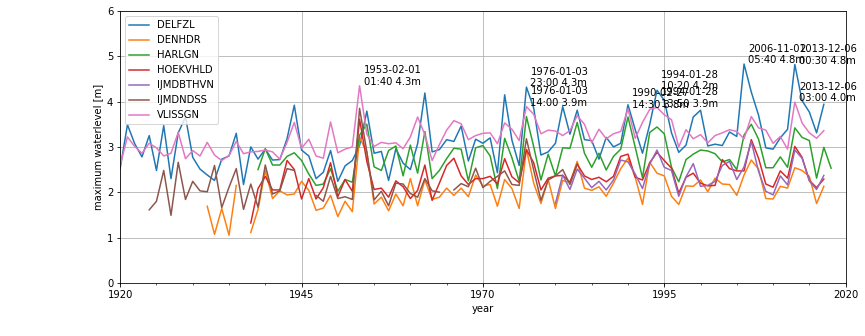

In [3]:
# plot all the local annual maxima
fig, ax = plt.subplots(figsize=(13, 5))
for name, series in all_series.items():
    # fix the date
    resampled = series.resample('A', label='first', loffset=datetime.timedelta(days=1))
    resampled.max().plot(ax=ax, label=name)
# set the axis dimensions    
ax.set_xlim(datetime.datetime(1920, 1, 1), datetime.datetime(2020, 1, 1));
ax.set_ylim(0, 6)
ax.legend(loc='best')

# annotate the peaks
for name, series in sorted(all_series.items()):
    if name not in ('DELFZL', 'VLISSGN'):
        continue
    # show the biggest peaks
    peaks_idx = peakutils.indexes(series, thres=0.88, min_dist=100)
    peaks = series.iloc[peaks_idx].sort_values(ascending=False).head(n=5)
    for date, val in peaks.items():
        ax.annotate(
            "{} {:.1f}m".format(
                date.strftime('%Y-%m-%d\n%H:%M'), val
            ), 
            (date, val), 
            textcoords='offset points', 
            xytext=(4, 1)
        )
ax.set_xlabel('year')
ax.set_ylabel('maximum waterlevel [m]');
ax.grid(True)

fig.savefig('annual-maxima.pdf')

In [4]:
# show maxima for lookup
for name, series in sorted(all_series.items()):
    peaks_idx = peakutils.indexes(series, thres=0.88, min_dist=100)
    peaks = series.iloc[peaks_idx].sort_values(ascending=False).head(n=5)
    print(peaks)


2006-11-01 05:40:00.000000    4.83
2013-12-06 00:30:00.000006    4.82
1976-01-03 23:00:00.000006    4.32
1916-01-13 16:40:00.000000    4.26
1994-01-28 10:20:00.000000    4.25
Name: DELFZL, dtype: float32
1953-02-01 04:40:00    3.20
1976-01-03 19:00:00    2.95
1954-12-22 04:40:00    2.89
1990-02-26 19:40:00    2.75
2007-11-09 05:20:00    2.71
Name: DENHDR, dtype: float32
1976-01-03 20:00:00.000006    3.67
1990-02-26 21:00:00.000000    3.66
1983-02-01 23:00:00.000006    3.54
1954-12-22 04:40:00.000000    3.50
2007-11-09 07:20:00.000000    3.50
Name: HARLGN, dtype: float32
1953-02-01 04:40:00    3.61
2007-11-09 01:40:00    3.16
2013-12-06 04:00:00    3.01
1976-01-03 16:00:00    2.94
Name: HOEKVHLD, dtype: float32
2007-11-09 02:39:59.999998    3.12
2013-12-06 04:49:59.999996    2.93
1994-01-28 15:19:59.999996    2.93
2014-10-22 02:10:00.000004    2.75
1989-02-14 08:50:00.000002    2.71
Name: IJMDBTHVN, dtype: float32
1953-02-01 04:40:00    3.85
1976-01-03 16:00:00    3.18
Name: IJMDNDSS, d